In [0]:
# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

sdf_features = spark.read.format("csv")\
.option('inferSchema', infer_schema)\
.option('header', first_row_is_header)\
.option('sep', delimiter)\
.load("dbfs:/FileStore/shared_uploads/mariashaukat352@gmail.com/features.csv") # check DataFrameReader in spark documentation to understand options

sdf_features.show(10)


+-----+----------+-----------+----------+---------+---------+---------+---------+---------+-----------+------------+---------+
Store| Date|Temperature|Fuel_Price|MarkDown1|MarkDown2|MarkDown3|MarkDown4|MarkDown5| CPI|Unemployment|IsHoliday|
+-----+----------+-----------+----------+---------+---------+---------+---------+---------+-----------+------------+---------+
 1|2010-02-05| 42.31| 2.572| NA| NA| NA| NA| NA|211.0963582| 8.106| false|
 1|2010-02-12| 38.51| 2.548| NA| NA| NA| NA| NA|211.2421698| 8.106| true|
 1|2010-02-19| 39.93| 2.514| NA| NA| NA| NA| NA|211.2891429| 8.106| false|
 1|2010-02-26| 46.63| 2.561| NA| NA| NA| NA| NA|211.3196429| 8.106| false|
 1|2010-03-05| 46.5| 2.625| NA| NA| NA| NA| NA|211.3501429| 8.106| false|
 1|2010-03-12| 57.79| 2.667| NA| NA| NA| NA| NA|211.3806429| 8.106| false|
 1|2010-03-19| 54.58| 2.72| NA| NA| NA| NA| NA| 211.215635| 8.106| false|
 1|2010-03-26| 51.45| 2.732| NA| NA| NA| NA| NA|211.0180424| 8.106| false|
 1|2010-04-02| 62.27| 2.719| NA| NA| NA| NA| NA|210.8204499| 7.808| false|
 1|2010-04-09| 65.86| 2.77| NA| NA| NA| NA| NA|210.6228574| 7.808| false|
+-----+----------+-----------+----------+---------+---------+---------+---------+---------+-----------+------------+---------+
only showing top 10 rows

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, TimestampType, DoubleType, DateType

schema_def = StructType([StructField('Store',IntegerType(),True),
                    StructField('Dept',IntegerType(),True),
                    StructField('Date',TimestampType(),False), # how to read, when the field is dateType
                    StructField('Weekly_Sales',FloatType(),True),
                    StructField('IsHoliday',StringType(),True)])

sdf_train = spark.read.csv("dbfs:/FileStore/shared_uploads/mariashaukat352@gmail.com/train.csv", schema=schema_def, sep=',', header='true', dateFormat='yyyy-mm-dd')
sdf_train.show(10)

+-----+----+-------------------+------------+---------+
Store|Dept| Date|Weekly_Sales|IsHoliday|
+-----+----+-------------------+------------+---------+
 1| 1|2010-02-05 00:00:00| 24924.5| FALSE|
 1| 1|2010-02-12 00:00:00| 46039.49| TRUE|
 1| 1|2010-02-19 00:00:00| 41595.55| FALSE|
 1| 1|2010-02-26 00:00:00| 19403.54| FALSE|
 1| 1|2010-03-05 00:00:00| 21827.9| FALSE|
 1| 1|2010-03-12 00:00:00| 21043.39| FALSE|
 1| 1|2010-03-19 00:00:00| 22136.64| FALSE|
 1| 1|2010-03-26 00:00:00| 26229.21| FALSE|
 1| 1|2010-04-02 00:00:00| 57258.43| FALSE|
 1| 1|2010-04-09 00:00:00| 42960.91| FALSE|
+-----+----+-------------------+------------+---------+
only showing top 10 rows

In [0]:
import pyspark
dir(pyspark.sql.types)

Out[3]: ['ArrayType',
 'AtomicType',
 'BinaryType',
 'BooleanType',
 'ByteType',
 'CloudPickleSerializer',
 'DataType',
 'DataTypeSingleton',
 'DateConverter',
 'DateType',
 'DatetimeConverter',
 'DecimalType',
 'DoubleType',
 'FloatType',
 'FractionalType',
 'IntegerType',
 'IntegralType',
 'JavaClass',
 'LongType',
 'MapType',
 'NullType',
 'NumericType',
 'Row',
 'ShortType',
 'SparkContext',
 'StringType',
 'StructField',
 'StructType',
 'TimestampType',
 'UserDefinedType',
 '_FIXED_DECIMAL',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acceptable_types',
 '_all_atomic_types',
 '_all_complex_types',
 '_array_signed_int_typecode_ctype_mappings',
 '_array_type_mappings',
 '_array_unsigned_int_typecode_ctype_mappings',
 '_atomic_types',
 '_create_converter',
 '_create_row',
 '_create_row_inbound_converter',
 '_has_nulltype',
 '_infer_schema',
 '_infer_type',
 '_int_size_to_type',
 '_make_type_verifier',
 '_merge_type',
 '_need_converter',
 '_parse_datatype_json_string',
 '_parse_datatype_json_value',
 '_parse_datatype_string',
 '_test',
 '_type_mappings',
 '_typecode',
 'array',
 'base64',
 'calendar',
 'ctypes',
 'datetime',
 'decimal',
 'dt',
 'json',
 're',
 'register_input_converter',
 'size',
 'sys',
 'time']

In [0]:
sdf_train.describe().show()

+-------+------------------+------------------+------------------+---------+
summary| Store| Dept| Weekly_Sales|IsHoliday|
+-------+------------------+------------------+------------------+---------+
 count| 421570| 421570| 421570| 421570|
 mean|22.200545579619043| 44.26031738501317|15981.258121355462| null|
 stddev|12.785297389902782|30.492054015786017|22711.183511991756| null|
 min| 1| 1| -4988.94| FALSE|
 max| 45| 99| 693099.4| TRUE|
+-------+------------------+------------------+------------------+---------+

In [0]:
# there is a negative weekly_sales value?
sdf_train.filter('Weekly_Sales<0').select('Weekly_Sales').count()
# do we need to do something about them?

Out[5]: 1285

In [0]:
from pyspark.sql.functions import expr
ts = sdf_train['Store','Dept','Date', 'Weekly_Sales']
ts.sort('Store').select(['Store','Dept']).distinct().count() # number of distinct combinations of stores and dept

Out[6]: 3331

Out[7]:

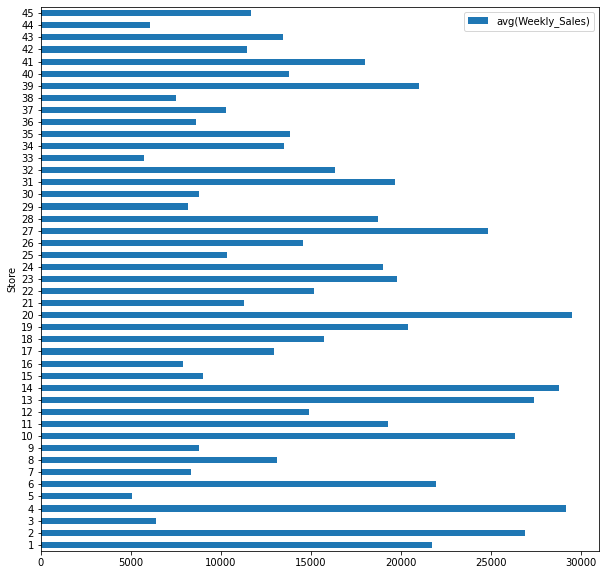

<matplotlib.axes._subplots.AxesSubplot at 0x7f00696c5c70>

In [0]:
 # TODO do we always have to convert SDF to PDF to plot?


#from matplotlib import pyplot as plt
mean_sale_per_store = ts.sort('Store').groupBy(['Store']).avg('Weekly_Sales')
pdf_mean_sale_per_store = mean_sale_per_store.toPandas()
pdf_mean_sale_per_store.plot(x='Store', y='avg(Weekly_Sales)',kind='barh', figsize=(10,10))


Out[8]:

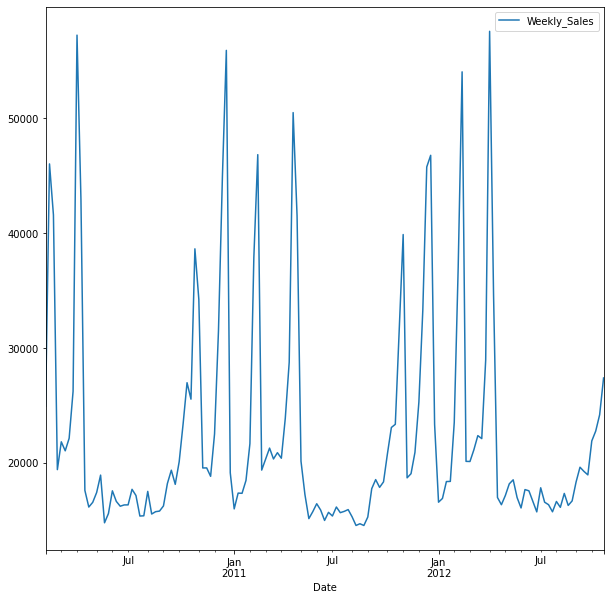

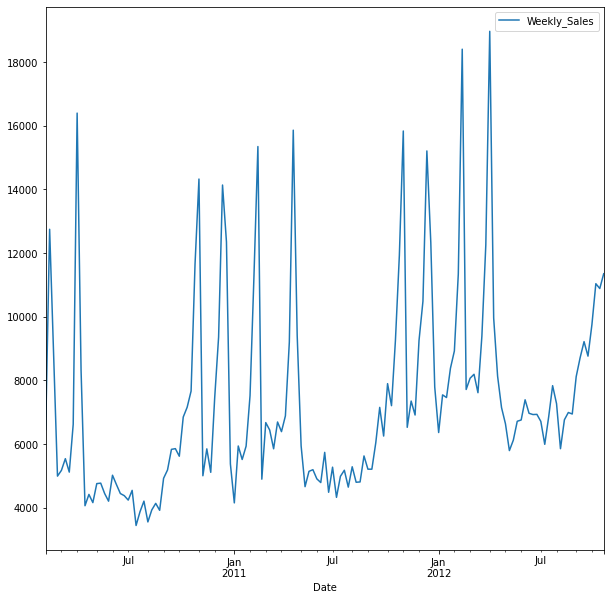

<matplotlib.axes._subplots.AxesSubplot at 0x7f0068a94640>

In [0]:
pdf1 = ts.filter('Store==1 and Dept==1').select('Date','Weekly_Sales').sort('Date').toPandas()
pdf2 = ts.filter('Store==3 and Dept==1').select('Date','Weekly_Sales').toPandas()
pdf1.plot(x='Date', y='Weekly_Sales', figsize=(10,10))
pdf2.plot(x='Date', y='Weekly_Sales', figsize=(10,10))

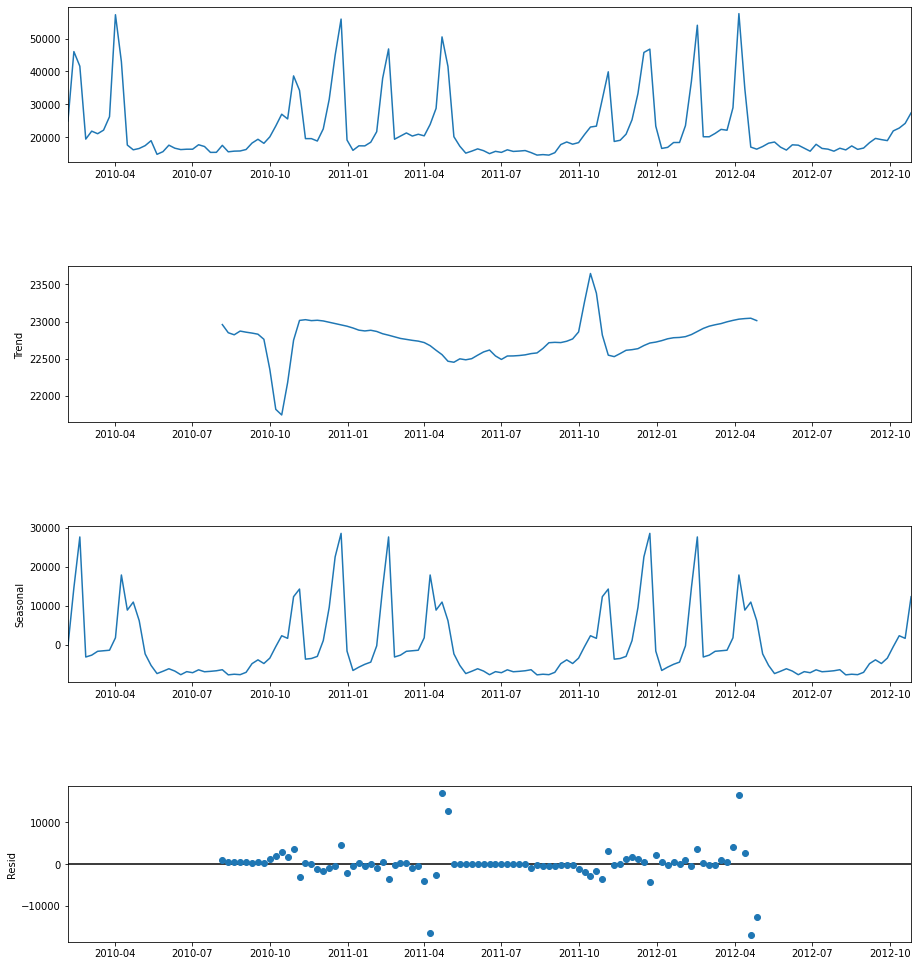

In [0]:
import statsmodels.tsa.api as sm
import matplotlib.pyplot as plt

seas_d = sm.seasonal_decompose(pdf1.set_index('Date'), model='additive', period=52) # 52 is for 365/7
fig = seas_d.plot()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

# there is no defined trend
# there is a seasonality

In [0]:
import pandas as pd

temp_data = [[1, 'maria'], [2, 'ahsan'], [3, 'bubu']]

temp_pdf = pd.DataFrame(temp_data, columns=['number', 'name'])
#temp_pdf.shift
temp_pdf['number'].shift(1)

Out[10]: 0 NaN
1 1.0
2 2.0
Name: number, dtype: float64

In [0]:
# TODO this is very clumsy 

from pyspark.sql.functions import min as min_, max as max_

sdf1 = ts.filter('Store==15 and Dept==1').select('Date','Weekly_Sales').sort('Date')
min_time, max_time = sdf1.select(min_('Date').cast('long'), max_('Date').cast('long')).first()

step = 7*24*60*60

reference = spark.range((min_time/step)*step, ((max_time/step)+1)*step, step)
reference = reference.withColumn('id', expr('to_timestamp(id)')).withColumnRenamed('id', 'Date')

if reference.count()!=sdf1.select('Date').count():
  print('Data has missing values')
  sdf1.join(other=reference, on='Date', how='left')
  sdf1.show()

In [0]:
help(spark.range)

Help on method range in module pyspark.sql.session:

range(start, end=None, step=1, numPartitions=None) method of pyspark.sql.session.SparkSession instance
 Create a :class:`DataFrame` with single :class:`pyspark.sql.types.LongType` column named
 ``id``, containing elements in a range from ``start`` to ``end`` (exclusive) with
 step value ``step``.
 
 .. versionadded:: 2.0.0
 
 Parameters
 ----------
 start : int
 the start value
 end : int, optional
 the end value (exclusive)
 step : int, optional
 the incremental step (default: 1)
 numPartitions : int, optional
 the number of partitions of the DataFrame
 
 Returns
 -------
 :class:`DataFrame`
 
 Examples
 --------
 >>> spark.range(1, 7, 2).collect()
 [Row(id=1), Row(id=3), Row(id=5)]
 
 If only one argument is specified, it will be used as the end value.
 
 >>> spark.range(3).collect()
 [Row(id=0), Row(id=1), Row(id=2)]

In [0]:
help(sdf1.join)

Help on method join in module pyspark.sql.dataframe:

join(other, on=None, how=None) method of pyspark.sql.dataframe.DataFrame instance
 Joins with another :class:`DataFrame`, using the given join expression.
 
 .. versionadded:: 1.3.0
 
 Parameters
 ----------
 other : :class:`DataFrame`
 Right side of the join
 on : str, list or :class:`Column`, optional
 a string for the join column name, a list of column names,
 a join expression (Column), or a list of Columns.
 If `on` is a string or a list of strings indicating the name of the join column(s),
 the column(s) must exist on both sides, and this performs an equi-join.
 how : str, optional
 default ``inner``. Must be one of: ``inner``, ``cross``, ``outer``,
 ``full``, ``fullouter``, ``full_outer``, ``left``, ``leftouter``, ``left_outer``,
 ``right``, ``rightouter``, ``right_outer``, ``semi``, ``leftsemi``, ``left_semi``,
 ``anti``, ``leftanti`` and ``left_anti``.
 
 Examples
 --------
 The following performs a full outer join between ``df1`` and ``df2``.
 
 >>> from pyspark.sql.functions import desc
 >>> df.join(df2, df.name == df2.name, 'outer').select(df.name, df2.height) .sort(desc("name")).collect()
 [Row(name='Bob', height=85), Row(name='Alice', height=None), Row(name=None, height=80)]
 
 >>> df.join(df2, 'name', 'outer').select('name', 'height').sort(desc("name")).collect()
 [Row(name='Tom', height=80), Row(name='Bob', height=85), Row(name='Alice', height=None)]
 
 >>> cond = [df.name == df3.name, df.age == df3.age]
 >>> df.join(df3, cond, 'outer').select(df.name, df3.age).collect()
 [Row(name='Alice', age=2), Row(name='Bob', age=5)]
 
 >>> df.join(df2, 'name').select(df.name, df2.height).collect()
 [Row(name='Bob', height=85)]
 
 >>> df.join(df4, ['name', 'age']).select(df.name, df.age).collect()
 [Row(name='Bob', age=5)]

In [0]:
# NOT Needed use pandas_udf instead

"""
# divide into different dataframes for different locations

#locs = [ts.select(['Date','Weekly_Sales']) for sdf in ts.groupBy(['Store','Dept'])]
group = ts.groupBy('Store')
locs = [groups.get_group(df).set_index('timestamp').value for df in groups.groups]
locs
"""

help(sm.seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
 Seasonal decomposition using moving averages.
 
 Parameters
 ----------
 x : array_like
 Time series. If 2d, individual series are in columns. x must contain 2
 complete cycles.
 model : {"additive", "multiplicative"}, optional
 Type of seasonal component. Abbreviations are accepted.
 filt : array_like, optional
 The filter coefficients for filtering out the seasonal component.
 The concrete moving average method used in filtering is determined by
 two_sided.
 period : int, optional
 Period of the series. Must be used if x is not a pandas object or if
 the index of x does not have a frequency. Overrides default
 periodicity of x if x is a pandas object with a timeseries index.
 two_sided : bool, optional
 The moving average method used in filtering.
 If True (default), a centered moving average is computed using the
 filt. If False, the filter coefficients are for past values only.
 extrapolate_trend : int or 'freq', optional
 If set to > 0, the trend resulting from the convolution is
 linear least-squares extrapolated on both ends (or the single one
 if two_sided is False) considering this many (+1) closest points.
 If set to 'freq', use `freq` closest points. Setting this parameter
 results in no NaN values in trend or resid components.
 
 Returns
 -------
 DecomposeResult
 A object with seasonal, trend, and resid attributes.
 
 See Also
 --------
 statsmodels.tsa.filters.bk_filter.bkfilter
 Baxter-King filter.
 statsmodels.tsa.filters.cf_filter.cffilter
 Christiano-Fitzgerald asymmetric, random walk filter.
 statsmodels.tsa.filters.hp_filter.hpfilter
 Hodrick-Prescott filter.
 statsmodels.tsa.filters.convolution_filter
 Linear filtering via convolution.
 statsmodels.tsa.seasonal.STL
 Season-Trend decomposition using LOESS.
 
 Notes
 -----
 This is a naive decomposition. More sophisticated methods should
 be preferred.
 
 The additive model is Y[t] = T[t] + S[t] + e[t]
 
 The multiplicative model is Y[t] = T[t] * S[t] * e[t]
 
 The seasonal component is first removed by applying a convolution
 filter to the data. The average of this smoothed series for each
 period is the returned seasonal component.

In [0]:
temp_pdf = ts.filter('Store==1').select('Date', 'Weekly_Sales').dropna().toPandas()

temp_pdf2 = temp_pdf.set_index('Date')
sarimax_model = sm.statespace.SARIMAX(temp_pdf2['Weekly_Sales'],order=(1,1,1), trend='c').fit()


/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
 warnings.warn('A date index has been provided, but it has no'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
 warnings.warn('A date index has been provided, but it is not'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
 warnings.warn('A date index has been provided, but it has no'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
 warnings.warn('A date index has been provided, but it is not'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
 warn('Non-invertible starting MA parameters found.'

In [0]:
sarimax_model.forecast(10).values[0]
#help(sarimax_model.forecast)

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
 warnings.warn('No supported index is available.'
Out[16]: 108.41552572893369

In [0]:
# pandas_udf are used to run pandas functionality on pyspark dataframe
# mostly used for groupby operations or rolling/window functions
from pyspark.sql.functions import pandas_udf, PandasUDFType
import pandas as pd

schema = StructType([StructField('Store', StringType(), True),
                    StructField('Dept', StringType(), True),
                    StructField('weekly_forecast_0', DoubleType(), True),
                    StructField('weekly_forecast_1', DoubleType(), True)])

@pandas_udf(schema, PandasUDFType.GROUPED_MAP) # a decorator is used to turn a pyspark function into a pandas_udf
def sarimax_model(data): # input argument is pandas dataframe
  data = data.set_index('Date') # you see here, .set_index is a pandas method not pyspark
  sarimax_model = sm.statespace.SARIMAX(data['Weekly_Sales'],order=(1,1,1), trend='c').fit()
  forecasts = sarimax_model.forecast(2)
  return pd.DataFrame({'Store': str(data.Store.iloc[0]), 'Dept':  str(data.Dept.iloc[0]), 'weekly_forecast_0': forecasts.values[0], 'weekly_forecast_1': forecasts.values[1]})  # returns a pyspark DataFrame with the mentioned schema, not a pandas dataframe

In [0]:
outcomes = ts.select('Store', 'Dept', 'Date', 'Weekly_Sales').groupBy(['Store', 'Dept']).applyInPandas(sarimax_model)
outcomes

/databricks/spark/python/pyspark/sql/pandas/group_ops.py:81: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
 warnings.warn(
Out[18]: DataFrame[Store: string, Dept: string, weekly_forecast_0: double, weekly_forecast_1: double]

In [0]:
import statsmodels.tsa.api as sm
from sm.tsa.ar_model import AutoReg
import numpy as np
import pandas as pd


schema = StructType([StructField('Store', StringType(), True),
                     StructField('Dept', StringType(), True),
                     StructField('weekly_forecast_1', DoubleType(), True),
                     StructField('weekly_forecast_2', DoubleType(), True)])

@pandas_udf(schema, PandasUDFType.GROUPED_MAP)

##using the holt winters time series algorithm for forecasting weekly sales
def ar_timeseries_udf(data):
  
    data.set_index('Date',inplace = True)
    time_series_data = data['Weekly_Sales']
    

    ##the model
    model_monthly = sm.ExponentialSmoothing(np.asarray(time_series_data),trend='add').fit()

    ##forecast values
    forecast_values = pd.Series(model_monthly.forecast(2),name = 'fitted_values')
   
    return pd.DataFrame({'Store': [str(data.Store.iloc[0])],'Dept': [str(data.Dept.iloc[0])],'weekly_forecast_1': [forecast_values[0]], 'weekly_forecast_2':[forecast_values[1]]})

--------------------------------------------------------------------------- 
 ModuleNotFoundError Traceback (most recent call last)
 <command-3339088274859265> in <module> 
 1 import statsmodels . tsa . api as sm
 ----> 2 from sm . tsa . ar_model import AutoReg
 3 import numpy as np
 4 import pandas as pd
 5 

 ModuleNotFoundError : No module named 'sm'